In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

%matplotlib inline

In [2]:
loc = "C:/Users/workspace/brad_public_workspace_on_win/non_code_files_brad_public_workspace_on_win/brad_public_workspace_on_win_non_code_files/SH_tongliang/data/2_19_2019_火币15分钟数据/火币15分钟数据/"

# Process 15min

In [3]:
def process_15mins_1000000(file, multiplier):
    asset = pd.read_csv(loc+file, engine="python", header = None)
    asset.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    asset['date'] = pd.to_datetime(asset['date'])
    asset.index = asset['date']
    asset = asset.iloc[1:]
    asset[['open', 'high', 'low', 'close']] = asset[['open', 'high', 'low', 'close']]*multiplier
    return asset


ltc_15mins_1000000 = process_15mins_1000000("ltc15min.csv", 1000000)
bch_15mins_1000000 = process_15mins_1000000("bch15min.csv", 1000000)
trx_15mins_1000000 = process_15mins_1000000("trx15min.csv", 1000000)
eos_15mins_1000000 = process_15mins_1000000("eos15min.csv", 1000000)

In [8]:
# bch_15mins_1000000.to_csv(loc+"bch_1000000_15mins.csv", index = False, header = None)
# ltc_15mins_1000000.to_csv(loc+"ltc_1000000_15mins.csv", index = False, header = None)
# eos_15mins_1000000.to_csv(loc+"eos_1000000_15mins.csv", index = False, header = None)
# trx_15mins_1000000.to_csv(loc+"trx_1000000_15mins.csv", index = False, header = None)

# Process Daily

In [4]:
def process_daily_1000000(file, multiplier):
    asset = pd.read_csv(loc+file, engine="python", header = None)
    asset.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    asset['date'] = pd.to_datetime(asset['date'])
    asset.index = asset['date']
    asset = asset.iloc[1:]
    daily_asset = asset.resample('D').last()
    daily_asset[['open', 'high', 'low', 'close']] = daily_asset[['open', 'high', 'low', 'close']]*multiplier
    return daily_asset

ltc_daily_1000000 = process_daily_1000000("ltc15min.csv", 1000000)
bch_daily_1000000 = process_daily_1000000("bch15min.csv", 1000000)
trx_daily_1000000 = process_daily_1000000("trx15min.csv", 1000000)
eos_daily_1000000 = process_daily_1000000("eos15min.csv", 1000000)

In [5]:
# daily_bch_convrted.to_csv(loc+"bch_1000000_daily.csv", index = False, header = None)
# daily_eos_convrted.to_csv(loc+"eos_1000000_daily.csv", index = False, header = None)
# daily_trx_convrted.to_csv(loc+"trx_1000000_daily.csv", index = False, header = None)
# daily_ltc_convrted.to_csv(loc+"ltc_1000000_daily.csv", index = False, header = None)

# Process 4H 

In [5]:
def process_4h(df):
    df = df.resample('4H').last()
    return df

In [6]:
eos_4h_1000000 = process_4h(eos_15mins_1000000)
bch_4h_1000000 = process_4h(bch_15mins_1000000)
trx_4h_1000000 = process_4h(trx_15mins_1000000)

# 生成 EOS & BCH & TRX series

In [7]:
eos_4h_sr = eos_4h_1000000['close']
eos_daily_sr = eos_daily_1000000['close']

bch_4h_sr = bch_4h_1000000['close']
bch_daily_sr = bch_daily_1000000['close']

trx_4h_sr = trx_4h_1000000['close']
trx_daily_sr = trx_daily_1000000['close']

## Create EOS&BCH dataframe

In [8]:
df_eos_bch_4h = pd.DataFrame()
df_eos_bch_4h['eos_4h'] = eos_4h_sr
df_eos_bch_4h['bch_4h'] = bch_4h_sr

df_eos_bch_daily = pd.DataFrame()
df_eos_bch_daily['eos_daily'] = eos_daily_sr
df_eos_bch_daily['bch_daily'] = bch_daily_sr

## Create EOS&TRX dataframe

In [9]:
df_eos_trx_4h = pd.DataFrame()
df_eos_trx_4h['eos_4h'] = eos_4h_sr
df_eos_trx_4h['trx_4h'] = trx_4h_sr
df_eos_trx_4h.dropna(inplace=True)

df_eos_trx_daily = pd.DataFrame()
df_eos_trx_daily['eos_daily'] = eos_daily_sr
df_eos_trx_daily['trx_daily'] = trx_daily_sr
df_eos_trx_daily.dropna(inplace=True)

In [10]:
df_eos_trx_daily

,eos_daily,trx_daily
date,,
2018-01-30,1191.00,5.1500
2018-01-31,1133.72,5.1700
2018-02-01,1106.31,5.0600
2018-02-02,1200.77,4.9300
2018-02-03,1163.80,4.8800
2018-02-04,1120.79,4.6700
2018-02-05,1098.00,4.3900
2018-02-06,1091.43,4.3800
2018-02-07,1043.30,4.4600


# 计算信号生成的具体时间

## 生成涨跌幅

In [11]:
df_eos_bch_4h_pct = df_eos_bch_4h.pct_change().dropna()
df_eos_bch_daily_pct = df_eos_bch_daily.pct_change().dropna()
df_eos_trx_4h_pct = df_eos_trx_4h.pct_change().dropna()
df_eos_trx_daily_pct = df_eos_trx_daily.pct_change().dropna()

In [12]:
df_eos_trx_daily_pct['QR'] = df_eos_trx_daily_pct['eos_daily'] - df_eos_trx_daily_pct['trx_daily']

In [13]:
df_eos_trx_4h_pct['QR'] = df_eos_trx_4h_pct['eos_4h'] - df_eos_trx_4h_pct['trx_4h']

Text(0.5,1,'QR: 4h EOS vs TRX')

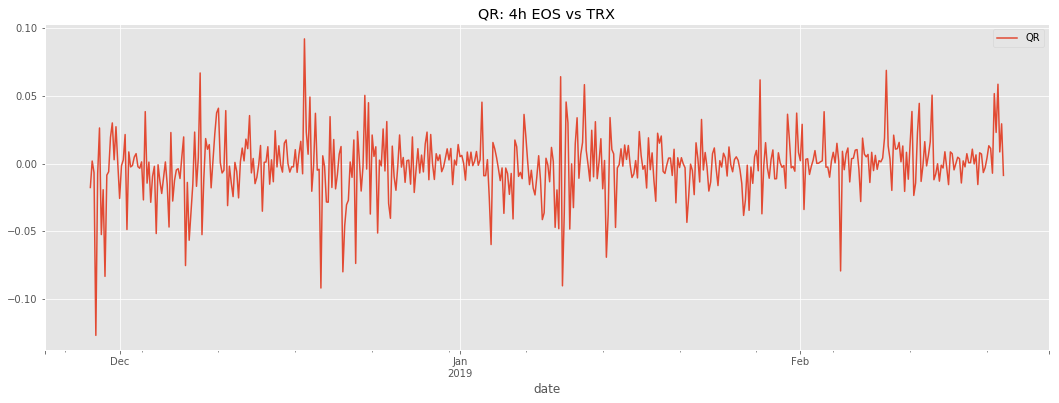

In [14]:
df_eos_trx_4h_pct['QR'].tail(500).plot(figsize = (18, 6))
plt.legend(['QR'])
plt.title('QR: 4h EOS vs TRX')

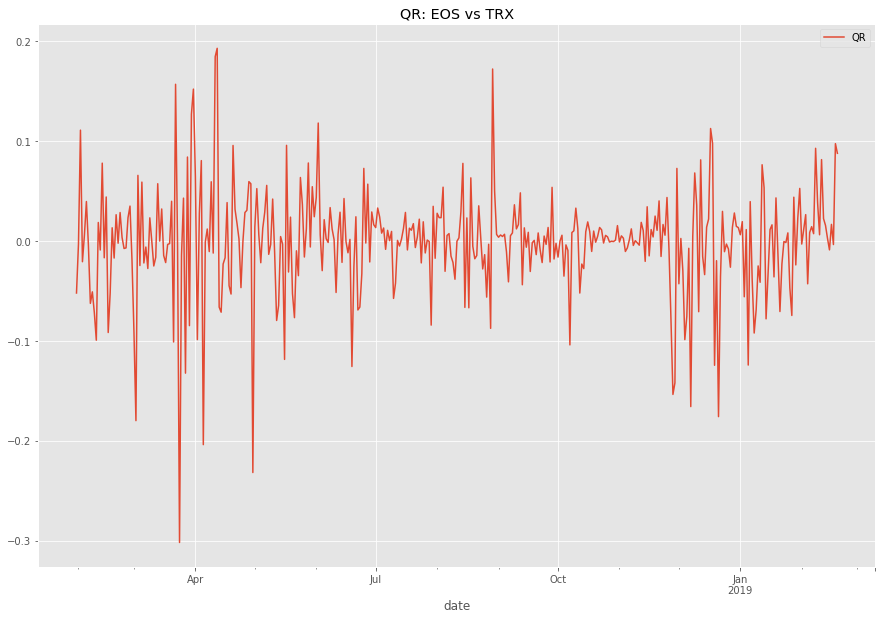

In [57]:
df_eos_trx_daily_pct['QR'].plot(figsize = (15, 10))
plt.legend(['QR'])
plt.title('QR: EOS vs TRX');

In [16]:
def MACD(df, price_col, n_fast, n_slow, n_emadiff): # n_fast = 12, n_slow = 26, n_emadiff = 9
    EMAfast = df[price_col].ewm(span = n_fast).mean()
    EMAslow = df[price_col].ewm(span = n_slow).mean()
    diff = pd.Series(EMAfast - EMAslow, name = 'diff' + str(n_fast) + '_' + str(n_slow))
    EMAdiff = diff.ewm(span = n_emadiff).mean().rename('EMAdiff' + '_' + str(n_emadiff))
    MACD = pd.Series(diff - EMAdiff, name = 'MACD' + str(n_fast) + '_' + str(n_slow) + '_' + str(n_emadiff))
    df['EMAfast'] = EMAfast
    df['EMAslow'] = EMAslow
    df['diff'] = diff
    df['EMAdiff'] = EMAdiff
    df['MACD'] = MACD
    return df

In [17]:
df_eos_trx_daily_pct.head(4)

,eos_daily,trx_daily,QR
date,,,
2018-01-31,-0.048094,0.003883,-0.051978
2018-02-01,-0.024177,-0.021277,-0.002900
2018-02-02,0.085383,-0.025692,0.111075
2018-02-03,-0.030789,-0.010142,-0.020647


In [18]:
df_eos_trx_daily_pct = MACD(df_eos_trx_daily_pct, 'QR', 12, 26, 9)

In [22]:
df_eos_trx_daily_pct.head(3)

,eos_daily,trx_daily,QR,EMAfast,EMAslow,diff,EMAdiff,MACD
date,,,,,,,,
2018-01-31,-0.048094,0.003883,-0.051978,-0.051978,-0.051978,0.000000,0.000000,0.000000
2018-02-01,-0.024177,-0.021277,-0.002900,-0.025394,-0.026495,0.001101,0.000612,0.000489
2018-02-02,0.085383,-0.025692,0.111075,0.027870,0.022932,0.004937,0.002385,0.002553


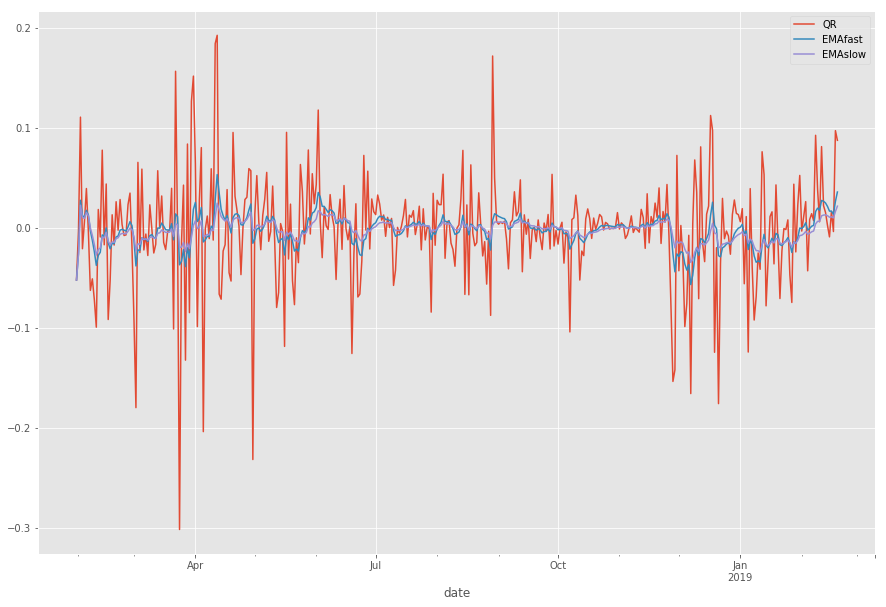

In [56]:
df_eos_trx_daily_pct[['QR','EMAfast' ,'EMAslow']].plot(figsize = (15, 10))
plt.legend(['QR','EMAfast' ,'EMAslow']);

In [26]:
def three_graphs_twinx(series1, series2, series3):
    
    fig = plt.figure(figsize = (30, 15))
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    series1.plot(ax = ax1, color = 'blue', lw = 1)
    series2.plot(ax = ax2, color = 'red', lw =1)
    series3.plot(ax = ax3, color = 'green', lw = 1)

    # ax1.axhline(-1.0, color='g', linestyle='--', lw=1)
#     ax2.axhline(0, color = 'red', linestyle='--', lw=1)
#     ax3.axhline(0, color = 'green', linestyle='--', lw=1)

In [54]:
def three_graphs(series1, series2, series3):

    fig, ax1 = plt.subplots(1,1, figsize=(15,10), sharex=True)
    
    series1.plot(ax = ax1, color = 'grey', lw=1)
    series2.plot(ax = ax1, color = 'red', lw=2)
    series3.plot(ax = ax1, color = 'green', lw = 2)
    plt.legend(['QR', 'EMAfast', 'EMAslow'], fontsize = 13)

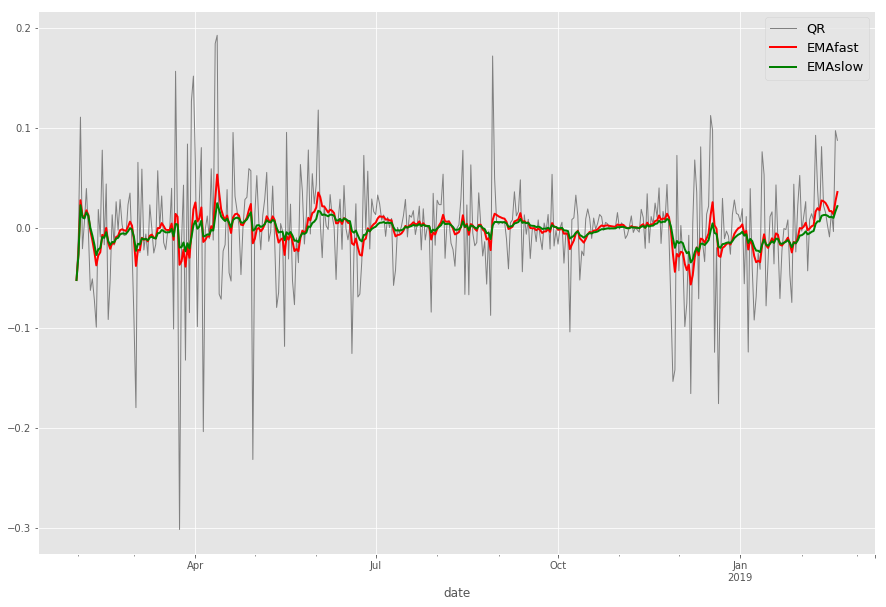

In [55]:
three_graphs(qr, emafast, emaslow)

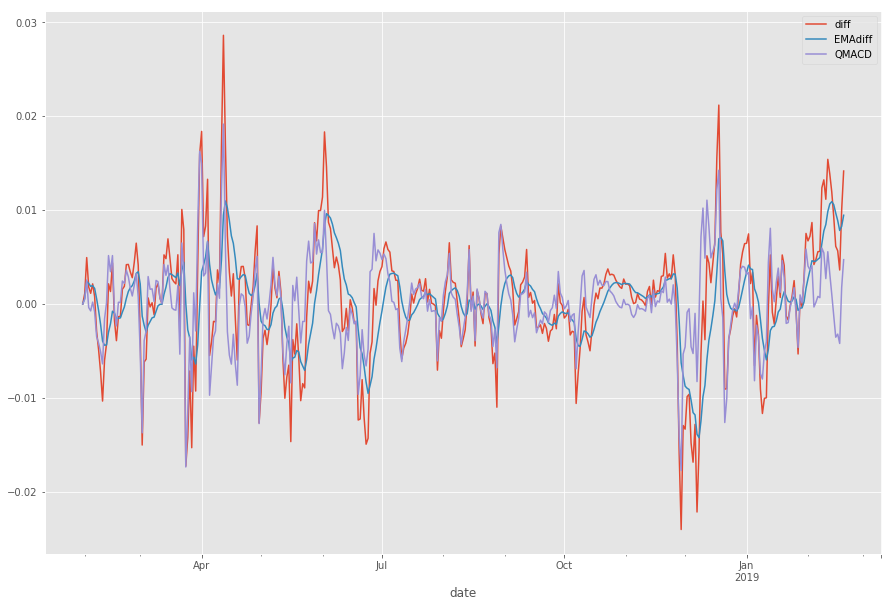

In [53]:
df_eos_trx_daily_pct[['diff', 'EMAdiff', 'MACD']].plot(figsize = (15, 10))
plt.legend(['diff', 'EMAdiff', 'QMACD']);

In [12]:
def ma_tmsum(sr, N1, N2):
    fast_ma = sr.rolling(window=N1).mean()
    slow_ma = sr.rolling(window=N2).mean()
    return fast_ma, slow_ma

## 4H频率

In [13]:
df_eos_bch_4h_pct['TM'] = df_eos_bch_4h_pct['eos_4h'] - df_eos_bch_4h_pct['bch_4h']
df_eos_bch_4h_pct['TMSUM'] = df_eos_bch_4h_pct['TM'].cumsum()
fast_ma_eos_bch_4h_tmsum, slow_ma_eos_bch_4h_tmsum = ma_tmsum(df_eos_bch_4h_pct['TMSUM'], 5, 10)
df_eos_bch_4h_pct['MAF'] = fast_ma_eos_bch_4h_tmsum
df_eos_bch_4h_pct['MAS'] = slow_ma_eos_bch_4h_tmsum
df_eos_bch_4h_pct['MA_diff'] = df_eos_bch_4h_pct['MAF'] - df_eos_bch_4h_pct['MAS']

In [14]:
df_eos_bch_4h_pct['2017-11-18 16:00:00':'2017-11-18 16:00:00']

,eos_4h,bch_4h,TM,TMSUM,MAF,MAS,MA_diff
date,,,,,,,
2017-11-18 16:00:00,-0.0656,0.008907,-0.074507,-0.074507,NaN,NaN,NaN


### EOS&BCH

### EOS&TRX（4h找到参数组）

In [15]:
df_eos_trx_4h_pct.head(8)

,eos_4h,trx_4h
date,,
2018-01-30 20:00:00,0.010941,0.057495
2018-01-31 00:00:00,-0.034383,-0.009709
2018-01-31 04:00:00,-0.031494,0.013725
2018-01-31 08:00:00,0.037052,0.003868
2018-01-31 12:00:00,-0.003333,-0.001927
2018-01-31 16:00:00,-0.008035,0.001931
2018-01-31 20:00:00,-0.007250,-0.003854
2018-02-01 00:00:00,0.004754,0.029014


In [16]:
# start_date = "2018-12-01"
# df_eos_trx_4h_pct_ = df_eos_trx_4h_pct[start_date:]
# df_eos_trx_4h_pct_['TM'] = df_eos_trx_4h_pct_['eos_4h'] - df_eos_trx_4h_pct_['trx_4h']
# df_eos_trx_4h_pct_['TMSUM'] = df_eos_trx_4h_pct_['TM'].cumsum()

# for n1 in range(1, 50, 1):
#     for n2 in range(2, 120, 1):
#         fast_ma, slow_ma = ma_tmsum(df_eos_trx_4h_pct_['TMSUM'], n1, n2)
#         fast_slow_diff = fast_ma-slow_ma
#         condition = (fast_slow_diff['2019-02-15 20:00:00']<0 and \
#                      fast_slow_diff['2019-02-16 00:00:00']>0 and \
#                      fast_slow_diff['2019-02-16 04:00:00']>0 and \
#                      fast_slow_diff['2019-02-16 08:00:00']>0 and \
#                      fast_slow_diff['2019-02-16 12:00:00']>0 and \
#                      fast_slow_diff['2019-02-16 16:00:00']>0 and \
#                      fast_slow_diff['2019-02-16 20:00:00']>0 and \
#                      fast_slow_diff['2019-02-17 00:00:00']>0 and \
#                      fast_slow_diff['2019-02-17 04:00:00']>0 and \
#                      fast_slow_diff['2019-02-17 08:00:00']>0 and \
#                      fast_slow_diff['2019-02-17 12:00:00']>0 and \
#                      fast_slow_diff['2019-02-17 16:00:00']>0 and \
#                      fast_slow_diff['2019-02-17 20:00:00']>0 and \
#                      fast_slow_diff['2019-02-18 00:00:00']>0 and \
#                      fast_slow_diff['2019-02-18 04:00:00']>0 and \
#                      fast_slow_diff['2019-02-18 08:00:00']>0 and \
#                      fast_slow_diff['2019-02-18 12:00:00']>0 and \
#                      fast_slow_diff['2019-02-18 16:00:00']>0 and \
#                      fast_slow_diff['2019-02-18 20:00:00']>0 )
#         if condition == True:
#             print ("找到参数组：N1:{}; N2:{}".format(n1, n2))
#         else:
# #             print ("未找到，继续循环...")
#             pass

## Daily频率

### EOS&BCH（daily找到参数组）

In [17]:
df_eos_bch_daily_pct['TM'] = df_eos_bch_daily_pct['eos_daily'] - df_eos_bch_daily_pct['bch_daily']
df_eos_bch_daily_pct['TMSUM'] = df_eos_bch_daily_pct['TM'].cumsum()

# iteration works on the following code:
fast_ma_eos_bch_daily_tmsum, slow_ma_eos_bch_daily_tmsum = ma_tmsum(df_eos_bch_daily_pct['TMSUM'], 5, 10)
df_eos_bch_daily_pct['MAF'] = fast_ma_eos_bch_daily_tmsum
df_eos_bch_daily_pct['MAS'] = slow_ma_eos_bch_daily_tmsum
df_eos_bch_daily_pct['MA_diff'] = df_eos_bch_daily_pct['MAF'] - df_eos_bch_daily_pct['MAS']

In [21]:
df_eos_bch_daily_pct

,eos_daily,bch_daily,TM,TMSUM,MAF,MAS,MA_diff
date,,,,,,,
2017-11-19,0.027027,-0.091298,0.118325,0.118325,NaN,NaN,NaN
2017-11-20,-0.027126,-0.050593,0.023467,0.141792,NaN,NaN,NaN
2017-11-21,-0.013733,-0.024177,0.010444,0.152236,NaN,NaN,NaN
2017-11-22,-0.065654,0.098285,-0.163939,-0.011703,NaN,NaN,NaN
2017-11-23,0.062274,0.155730,-0.093456,-0.105158,0.059098,NaN,NaN
2017-11-24,-0.016197,0.117519,-0.133716,-0.238874,-0.012341,NaN,NaN
2017-11-25,-0.023550,-0.080442,0.056891,-0.181983,-0.077096,NaN,NaN
2017-11-26,0.235252,-0.063118,0.298371,0.116388,-0.084266,NaN,NaN
2017-11-27,0.041701,-0.034667,0.076368,0.192755,-0.043374,NaN,NaN


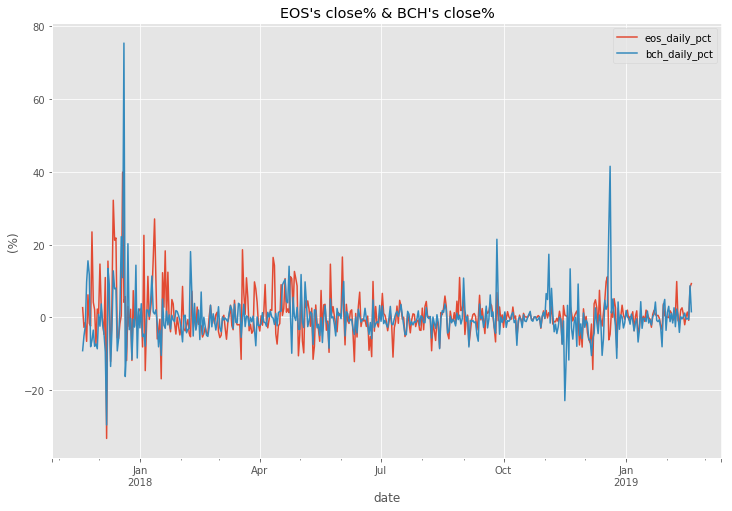

In [59]:
(df_eos_bch_daily_pct[['eos_daily', 'bch_daily']]*100).tail(500).plot(figsize = (12, 8))
plt.title("EOS's close% & BCH's close%")
plt.legend(["eos_daily_pct", "bch_daily_pct"])
plt.ylabel("(%)");

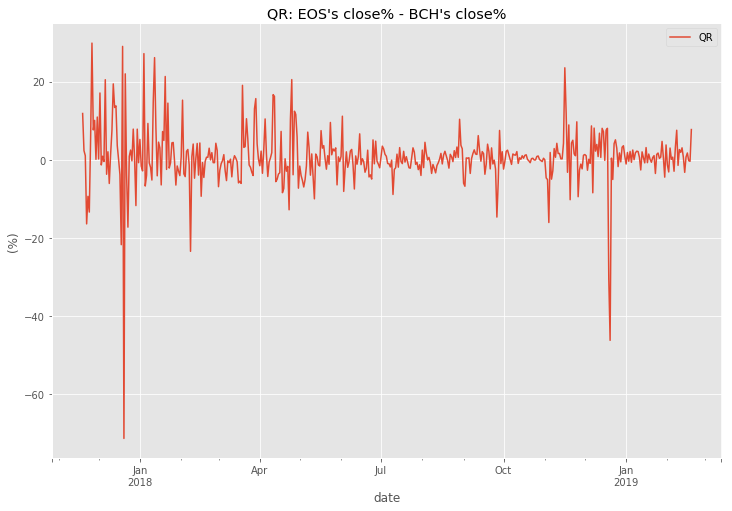

In [57]:
(df_eos_bch_daily_pct['TM']*100).tail(500).plot(figsize = (12, 8))
plt.title("QR: EOS's close% - BCH's close%")
plt.legend(["QR"])
plt.ylabel("(%)");

In [103]:
condition = (fast_ma['2019-02-15']['MA_diff']<0 and \
             df_eos_bch_daily_pct.loc['2019-02-16']['MA_diff']>0 and \
             df_eos_bch_daily_pct.loc['2019-02-17']['MA_diff']>0 and \
             df_eos_bch_daily_pct.loc['2019-02-18']['MA_diff']>0)

In [127]:
start_date = "2019-01-01"
df_eos_bch_daily_pct_ = df_eos_bch_daily_pct[start_date:]
df_eos_bch_daily_pct_['TM'] = df_eos_bch_daily_pct_['eos_daily'] - df_eos_bch_daily_pct_['bch_daily']
df_eos_bch_daily_pct_['TMSUM'] = df_eos_bch_daily_pct_['TM'].cumsum()

for n1 in range(1, 10, 1):
    for n2 in range(2, 60, 1):
        fast_ma, slow_ma = ma_tmsum(df_eos_bch_daily_pct_['TMSUM'], n1, n2)
        fast_slow_diff = fast_ma-slow_ma
        condition = (fast_slow_diff['2019-02-15']<0 and \
                     fast_slow_diff['2019-02-16']>0 and \
                     fast_slow_diff['2019-02-17']>0 and \
                     fast_slow_diff['2019-02-18']>0)
        if condition == True:
            print ("找到参数组：N1:{}; N2:{}".format(n1, n2))
        else:
#             print ("未找到，继续循环...")
            pass

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


找到参数组：N1:1; N2:4
找到参数组：N1:1; N2:5
找到参数组：N1:2; N2:6


### EOS&TRX（daily找到参数组）

In [131]:
start_date = "2018-12-01"
df_eos_trx_daily_pct_ = df_eos_trx_daily_pct[start_date:]
df_eos_trx_daily_pct_['TM'] = df_eos_trx_daily_pct_['eos_daily'] - df_eos_trx_daily_pct_['trx_daily']
df_eos_trx_daily_pct_['TMSUM'] = df_eos_trx_daily_pct_['TM'].cumsum()

for n1 in range(1, 10, 1):
    for n2 in range(2, 60, 1):
        fast_ma, slow_ma = ma_tmsum(df_eos_trx_daily_pct_['TMSUM'], n1, n2)
        fast_slow_diff = fast_ma-slow_ma
        condition = (fast_slow_diff['2019-02-15']<0 and \
                     fast_slow_diff['2019-02-16']>0 and \
                     fast_slow_diff['2019-02-17']>0 and \
                     fast_slow_diff['2019-02-18']>0)
        if condition == True:
            print ("找到参数组：N1:{}; N2:{}".format(n1, n2))
        else:
#             print ("未找到，继续循环...")
            pass

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


找到参数组：N1:1; N2:3
找到参数组：N1:1; N2:4


In [24]:
def calc_MA_diff():
    pass

In [34]:
def ma_high_low():
    return